<a href="https://colab.research.google.com/github/adithyaGHegde/Data-Science-ML-AI/blob/main/OCO2_TiNITHackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tri-NIT Hackathon: ML PS2: Team - Red Mountain**

### **Imports**

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.1/22.1 MB 82.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 122.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 119.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 31.1 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=344582 sha256=b44357bdba2f98cd53d1664cf663af3f1db3b44d5d96fb4142e6b44814107205
  Stored in directory: /tmp/pip-ephem-wheel-cache-w38zb_mp/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: file

In [ ]:
import netCDF4
import h5py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
 HDF5_USE_FILE_LOCKING = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_oco2= netCDF4.Dataset('/content/drive/MyDrive/oco2_LtCO2_221201_B11014Ar_230118175544s.SUB.nc4')

### **Data Retrieval and Cleaning**

Below is the code for retrieving and cleaning data of a single day (2022-12-01).
Model selection, training and testing has further been performed on this same
data.

In [ ]:
x = list(df_oco2.variables.keys())

In [ ]:
df_xco2 = pd.DataFrame(columns=[x])

In [ ]:
df_xco2["xco2"]= df_oco2["xco2"][:]
df_xco2["dateTime"]= df_oco2["time"][:]
df_xco2["latitude"]= df_oco2["latitude"][:]
df_xco2["longitude"]= df_oco2["longitude"][:]
df_xco2["xco2_quality_flag"]= df_oco2["xco2_quality_flag"][:]

df_xco2["time"]= df_oco2["time"][:]

df_xco2["date"]= df_oco2["date"][:]
df_xco2["solar_zenith_angle"]= df_oco2["solar_zenith_angle"][:]
df_xco2["sensor_zenith_angle"]= df_oco2["sensor_zenith_angle"][:]

df_xco2["xco2_qf_bitflag"]= df_oco2["xco2_qf_bitflag"][:]
df_xco2["vertex_latitude"]= df_oco2["vertex_latitude"][:]
df_xco2["vertex_longitude"]= df_oco2["vertex_longitude"][:]

df_xco2["xco2"]= df_oco2["xco2"][:]
df_xco2["xco2_uncertainty"]= df_oco2["xco2_uncertainty"][:]
df_xco2["xco2_apriori"]= df_oco2["xco2_apriori"][:]
df_xco2["pressure_levels"]= df_oco2["pressure_levels"][:]
df_xco2["co2_profile_apriori"]= df_oco2["co2_profile_apriori"][:]

df_xco2["xco2_averaging_kernel"]= df_oco2["xco2_averaging_kernel"][:]
df_xco2["pressure_weight"]= df_oco2["pressure_weight"][:]

In [ ]:
df_xco2.head()

,sounding_id_idx,longitude,latitude,time,epoch_dimension,sounding_id,levels,bands,vertices,footprints,...,vertex_latitude,vertex_longitude,xco2,xco2_uncertainty,xco2_apriori,pressure_levels,co2_profile_apriori,xco2_averaging_kernel,pressure_weight,dateTime
0,NaN,-151.261093,-44.004879,1.669853e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,-44.011852,-151.250046,414.994141,0.506680,415.296143,0.100589,404.134430,0.325984,0.026456,1.669853e+09
1,NaN,-151.278000,-44.009266,1.669853e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,-44.016235,-151.266953,414.728851,0.515175,415.295959,0.100534,404.134705,0.327744,0.026456,1.669853e+09
2,NaN,-151.294983,-44.013577,1.669853e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,-44.020569,-151.284027,414.877869,0.523403,415.295837,0.100541,404.135010,0.330715,0.026456,1.669853e+09
3,NaN,-151.312042,-44.017807,1.669853e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,-44.024632,-151.300629,415.276428,0.518690,415.295654,0.100628,404.135254,0.327138,0.026456,1.669853e+09
4,NaN,-151.199692,-43.967854,1.669853e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,-43.974728,-151.188400,415.028595,0.515234,415.296936,0.100596,404.130402,0.323964,0.026456,1.669853e+09


In [ ]:
df_xco2.isnull().sum()

sounding_id_idx           154511
longitude                      0
latitude                       0
time                           0
epoch_dimension           154511
sounding_id               154511
levels                    154511
bands                     154511
vertices                  154511
footprints                154511
date                           0
solar_zenith_angle             0
sensor_zenith_angle            0
xco2_quality_flag              0
xco2_qf_bitflag            98382
xco2_qf_simple_bitflag    154511
source_files              154511
file_index                154511
vertex_latitude                0
vertex_longitude               0
xco2                           0
xco2_uncertainty               0
xco2_apriori                   0
pressure_levels                0
co2_profile_apriori            0
xco2_averaging_kernel          0
pressure_weight                0
dateTime                       0
dtype: int64

In [ ]:
df_xco2.dropna(inplace=True, axis=1)

In [ ]:
df_xco2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154511 entries, 0 to 154510
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   (longitude,)              154511 non-null  float32
 1   (latitude,)               154511 non-null  float32
 2   (time,)                   154511 non-null  float64
 3   (date,)                   154511 non-null  int16  
 4   (solar_zenith_angle,)     154511 non-null  float32
 5   (sensor_zenith_angle,)    154511 non-null  float32
 6   (xco2_quality_flag,)      154511 non-null  int8   
 7   (vertex_latitude,)        154511 non-null  float32
 8   (vertex_longitude,)       154511 non-null  float32
 9   (xco2,)                   154511 non-null  float32
 10  (xco2_uncertainty,)       154511 non-null  float32
 11  (xco2_apriori,)           154511 non-null  float32
 12  (pressure_levels,)        154511 non-null  float32
 13  (co2_profile_apriori,)    154511 non-null  f

In [ ]:
corr = df_xco2.corr()

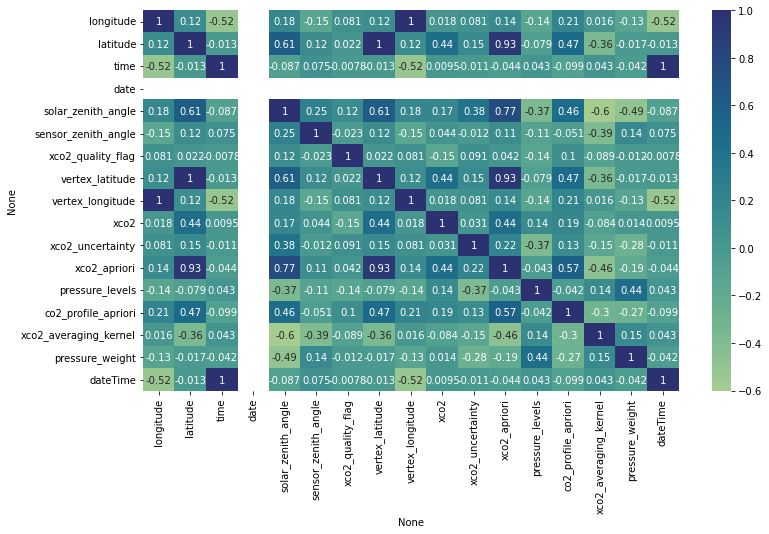

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True, cmap='crest')

In [ ]:
df_xco2.drop(['vertex_latitude', 'vertex_longitude', 'xco2_uncertainty', 'pressure_weight', 'sensor_zenith_angle', 'xco2_averaging_kernel'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
df_xco2.drop(['date', 'time'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
df_xco2.head()

,longitude,latitude,solar_zenith_angle,xco2_quality_flag,xco2,xco2_apriori,pressure_levels,co2_profile_apriori,dateTime
0,-151.261093,-44.004879,34.215626,0,414.994141,415.296143,0.100589,404.134430,1.669853e+09
1,-151.278000,-44.009266,34.207405,0,414.728851,415.295959,0.100534,404.134705,1.669853e+09
2,-151.294983,-44.013577,34.199100,0,414.877869,415.295837,0.100541,404.135010,1.669853e+09
3,-151.312042,-44.017807,34.190716,0,415.276428,415.295654,0.100628,404.135254,1.669853e+09
4,-151.199692,-43.967854,34.235783,0,415.028595,415.296936,0.100596,404.130402,1.669853e+09


In [ ]:
df_xco2["xco2_quality_flag"].value_counts()

(xco2_quality_flag,)
0                       97329
1                       57182
dtype: int64

### **Model Selection and Training**

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_xco2, test_size=0.2, random_state=42)

In [ ]:
train.head()

,longitude,latitude,solar_zenith_angle,xco2_quality_flag,xco2,xco2_apriori,pressure_levels,co2_profile_apriori,dateTime
1588,-156.032257,-24.753790,26.037994,0,415.547729,415.779846,0.101376,404.054321,1.669853e+09
66186,43.241714,26.520321,51.943085,0,415.925720,419.156067,0.092392,405.117310,1.669890e+09
88721,-11.702212,41.062317,64.481834,1,417.855560,422.858124,0.101379,408.175598,1.669902e+09
71079,25.563362,10.341282,40.596905,0,416.648804,417.827881,0.095572,407.611908,1.669895e+09
26135,145.751877,13.712364,41.688957,1,418.721527,417.890289,0.099340,403.455322,1.669866e+09


In [ ]:
training_labels = train["xco2"]
training_data = train.drop(["xco2"], axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scale_pipe = Pipeline([
    ('scaler', StandardScaler())
])

training_data_scaled = scale_pipe.fit_transform(training_data)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
training_data_scaled.shape

(123608, 8)

In [ ]:
training_labels_scaled = scale_pipe.fit_transform(training_labels)
training_labels_scaled

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[-0.3041092 ],
       [-0.13602936],
       [ 0.72210604],
       ...,
       [-0.12160429],
       [ 0.06426602],
       [-0.24627323]], dtype=float32)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=42)
forest.fit(training_data_scaled, training_labels_scaled)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


<ipython-input-93-2564a9ec5c82>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(training_data_scaled, training_labels_scaled)


RandomForestRegressor(random_state=42)

In [ ]:
training_predictions = forest.predict(training_data_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(training_labels_scaled, training_predictions)
rmse = np.sqrt(mse)
rmse

0.14386727286443654

In [ ]:
training_labels_scaled.max()

9.420556

In [ ]:
training_labels_scaled.min()

-23.508694

In [ ]:
training_labels_scaled.std()

0.99999994

### **Model Testing and Evaluation**

In [ ]:
testing_labels = test["xco2"]
testing_data = test.drop(["xco2"], axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
testing_data_scaled = scale_pipe.fit_transform(testing_data)
testing_labels_scaled = scale_pipe.fit_transform(testing_labels)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
testing_predictions = forest.predict(testing_data_scaled)

In [ ]:
mse = mean_squared_error(testing_labels_scaled, testing_predictions)
rmse = np.sqrt(mse)
rmse

0.4734156558242472

The model evaluation metric chosen is root mean squared error.
The rmse on the training data is 0.14386, and on the testing data is 0.47341.
Since the rmse on training data is quite lower than that on testing data,
the model has slightly overfitted the training data. However, seeing that the
rmse on testing data still falls below 0.5, it can be concluded that the chosen
model (Random Forest Regressor) is a good model to work on the given data.


### **Code Snippet for extracting data for multiple days**



In [ ]:
x = ["longitude","latitude","solar_zenith_angle","xco2_quality_flag","xco2","xco2_apriori","dateTime"]
df = pd.DataFrame(columns=[x])
df_master = pd.DataFrame()
for file in os.listdir(dir):
  if file.endswith(".nc4"):
    df_oco = netCDF4.Dataset(dir + "/" + file)
    presnt_cols = list(df_oco.variables.keys())
    for col in x:
      if col in presnt_cols:
          df[col] = pd.Series(df_oco[col][:].filled(np.nan))
          df.dropna(inplace=True, axis=1)
          df_master = pd.concat([df_master,df],ignore_index=True)